## Lab 6
 
In this lab, we will call **C** functions from Python using CFFI (C Foreign Function Interface).
CFFI is a wrapping library and provides a relatively simple way to call **C** functions from Python.
This allows us to interface with existing **C** libraries and programs.
This is particularly useful when dealing with a well-established library that we would like to use in our Python centered work flow, without having to rewrite the entire library in Python.

This approach has a number of benefits. It saves us from the need of rewriting the code and at the same time offers performance boost especially in the case of computationally intensive tasks.
While in this class we will look at the way to interface with a **C** code, similarly we might develop similar approach in the case of **C++**, and possibly other languages.

### The problem
We will solve a 1D linear advection problem of the form:

$$
\frac{\partial q}{\partial t} + u \nabla q = 0,
$$
supplemented by initial condition and a set of periodic boundary conditions. Our problem is very simple (and yet difficult!), but we would approach it the same for the more complex cases.

# Task 1
In the advection_solver folder we have <strong>C</strong> code for advection diffusion problem. First we have to build a library. Use following commands.  

```console
cd advection_solver/
mkdir build
cd build
cmake ../
make 

```
This will create a <strong>C</strong> library named  <em>"libadvection_implicit_serial.so"</em> and an executable file <em>"adv_serial"</em>.  

You can run the executable file using 

```console  
./adv_serial 
```
examine the resulting files. If you have time create plots of the solution at different times.

# Task 2

With CFFI load the shared library, describe functions that will be used and call the *main()* function. This will solve the equation and output result in the files. The result should be the same as before, with the only difference that we now run the code in a 'proper' Python call.

# Task 3

Examine the `advection_implicit_serial.c`. Prepare to call each of the functions from Python. Design the data structure so that it remains available to your Python code. Consider either CFFI specific allocation, or the `numpy` arrays (see the Lecture on tips how to do this).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from cffi import FFI
ffi = FFI()

lib = ffi.dlopen('./advection_solver/build/libadvection_implicit_serial.so')

ffi.cdef('''
    void solve_advection(int nx, int nt, double dt);
    void dump_solution(double *x, double *u, int nx, int idx);
    void explicit_euler_bd_1(double *u, double *un, int nx, double c, double dt, double dx);
    void explicit_euler_bd_2(double *u, double *un, int nx, double c, double dt, double dx);
    void implicit_euler_cn_2(double *u, double *b, double *un, int size, double c,
                         double dt, double dx, int N, double eps);
    double nrm(double* u, double *unew, int size);
''')

In [2]:
dt = 0.01
nx = 1000
dx = 1.0 / ( nx - 1 )
c = 1.0

In [3]:
sig = 0.05
mu = 0.5

In [4]:
x = np.linspace(0,1,nx)
u0 = 1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
u1 = np.zeros_like(u0)

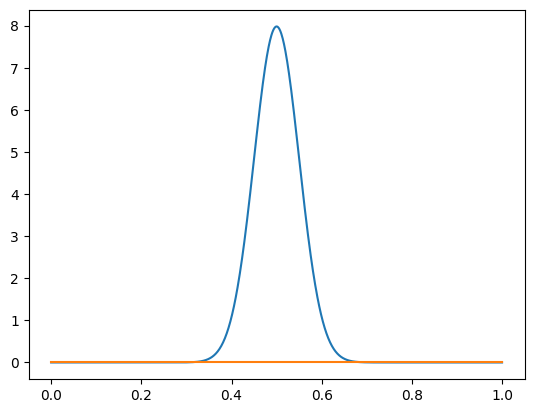

In [5]:
plt.plot(x,u0, x, u1)

In [6]:
uu0 = ffi.cast("double *", u0.ctypes.data)
uu1 = ffi.cast("double *", u1.ctypes.data)

In [7]:
print(uu0, uu1)

<cdata 'double *' 0x56484780bd90> <cdata 'double *' 0x564847816d30>


In [8]:
for i in range(0,1000):
#     print(uu0, uu1)
    lib.explicit_euler_bd_1(uu0, uu1, nx, c, dt, dx);
    tmp = uu1
    uu1 = uu0
    uu0 = tmp

0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x564847816d30 0x56484780bd90
0x56484780bd90 0x564847816d30
0x56484781

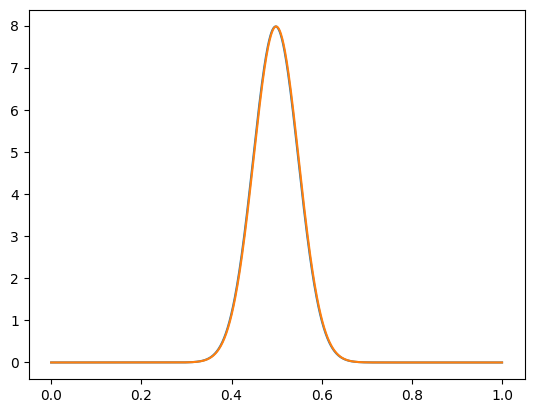

In [9]:
plt.plot(x, u1, x, u0)

In [10]:
x = np.linspace(0,1,nx)
u0 = ffi.new('double['+str(nx)+']')
u1 = ffi.new('double['+str(nx)+']')
# u0 = 1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)

In [11]:
for i, uu in enumerate(u0):
    u0[i] = 1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x[i] - mu) / sig, 2.0) / 2)

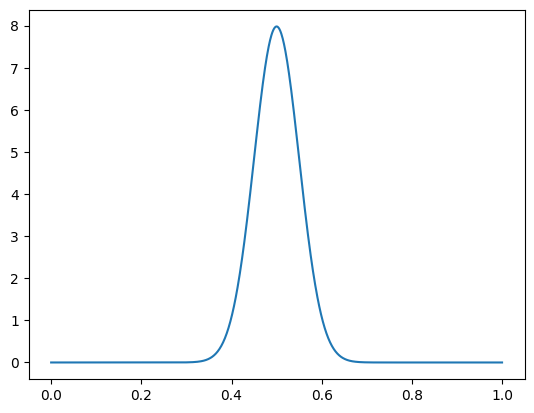

In [12]:
uu0 = [uu for uu in u0]
plt.plot(x, uu0)

In [13]:
print(u0, u1)
print(ffi.addressof(u0), ffi.addressof(u1))

<cdata 'double[1000]' owning 8000 bytes> <cdata 'double[1000]' owning 8000 bytes>
<cdata 'double(*)[1000]' 0x56484781c440> <cdata 'double(*)[1000]' 0x564847bd1770>


In [14]:
for i in range(0,1000):
    lib.explicit_euler_bd_2(u0, u1, nx, c, dt, dx);
    tmp = u1
    u1 = u0
    u0 = tmp

# Task 4

Solve the advection problem and plot the result. Examine the influence of the time step.